# Machine Learning 31 : Ensemble Model Classification

In [1]:
!pip install xgboost -q

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# import necessary modules from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Import ensemble classifiers
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,VotingClassifier

# Import other classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

# Import XGBClassifier
from xgboost import XGBClassifier

In [3]:
# import the data
df = sns.load_dataset('diamonds')

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.shape

(53940, 10)

In [6]:
# split the data into X and y
X = df.drop('cut', axis=1)
y = df['cut']

In [7]:
# encode the input variables
le = LabelEncoder()
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

In [8]:
# encode the target variable
y = le.fit_transform(y)

In [9]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Bagging classifier With Decision Tree 

In [10]:
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)

bag_clf.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,n_estimators,100
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,42
,verbose,0


In [11]:
# predict the test data
y_pred = bag_clf.predict(X_test)

In [12]:

print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Bagging Classifier Accuracy: 0.7887467556544309
[[ 289   26    5   12   11]
 [  32  721   14   22  216]
 [   3    3 3891  146  226]
 [   1    6  305 2200  271]
 [   3  162  486  329 1408]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       343
           1       0.79      0.72      0.75      1005
           2       0.83      0.91      0.87      4269
           3       0.81      0.79      0.80      2783
           4       0.66      0.59      0.62      2388

    accuracy                           0.79     10788
   macro avg       0.79      0.77      0.78     10788
weighted avg       0.78      0.79      0.79     10788



## Random Forest Classifier

In [13]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
# predict the test data
y_pred = rf.predict(X_test)

In [15]:
print(" Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

 Random Forest Accuracy: 0.7873563218390804
[[ 292   21    5   15   10]
 [  27  717   14   34  213]
 [   3    4 3910  158  194]
 [   0    9  305 2238  231]
 [   1  145  482  423 1337]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       343
           1       0.80      0.71      0.75      1005
           2       0.83      0.92      0.87      4269
           3       0.78      0.80      0.79      2783
           4       0.67      0.56      0.61      2388

    accuracy                           0.79     10788
   macro avg       0.80      0.77      0.78     10788
weighted avg       0.78      0.79      0.78     10788



## Voting Classifier (Logistic + KNN + DTC)

In [16]:
# Base models
log_clf = LogisticRegression(max_iter=1000)
knn_clf = KNeighborsClassifier(n_neighbors=5)
dt_clf = DecisionTreeClassifier(random_state=42)

In [17]:

# Voting Classifier (Hard voting)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('knn', knn_clf),
        ('dt', dt_clf)
    ],
    voting='hard'   # "hard" = majority voting, "soft" = probability-based voting
)

In [18]:
# Train
voting_clf.fit(X_train, y_train)

C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,estimators,"[('lr', ...), ('knn', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [19]:
# Prediction
y_pred = voting_clf.predict(X_test)

In [20]:
# Evaluation
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Voting Classifier Accuracy: 0.6409899888765295
Confusion Matrix:
 [[ 192   26   71   50    4]
 [  40  420  291  202   52]
 [   2   38 3969  198   62]
 [   6   56  652 2009   60]
 [  16  206 1182  659  325]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.56      0.64       343
           1       0.56      0.42      0.48      1005
           2       0.64      0.93      0.76      4269
           3       0.64      0.72      0.68      2783
           4       0.65      0.14      0.22      2388

    accuracy                           0.64     10788
   macro avg       0.65      0.55      0.56     10788
weighted avg       0.64      0.64      0.59     10788



## AdaBoost Classifier

In [21]:
# AdaBoost Classifier with Decision Tree as base estimator
adb_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    random_state=42
)
adb_clf.fit(X_train, y_train)

,estimator,DecisionTreeC...r(max_depth=1)
,n_estimators,100
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [22]:
y_pred = adb_clf.predict(X_test)

In [23]:
print("AdaBoost Classifier Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

AdaBoost Classifier Accuracy: 0.7112532443455691
[[ 252   39    9   39    4]
 [  31  522   31  231  190]
 [   3    3 4020  234    9]
 [   0   11  346 2406   20]
 [   6  140  667 1102  473]]
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       343
           1       0.73      0.52      0.61      1005
           2       0.79      0.94      0.86      4269
           3       0.60      0.86      0.71      2783
           4       0.68      0.20      0.31      2388

    accuracy                           0.71     10788
   macro avg       0.73      0.65      0.66     10788
weighted avg       0.71      0.71      0.67     10788



## XGBoost Classifier

In [24]:
# train the xgboost model
xgb = XGBClassifier(
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=0
)
xgb.fit(X_train, y_train)

C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [07:51:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [25]:
# predict the test data
y_pred = xgb.predict(X_test)

In [26]:
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

XGBoost Accuracy: 0.8001483129403041
[[ 297   20    6   12    8]
 [  23  735    9   17  221]
 [   3    3 3930  150  183]
 [   0    8  303 2246  226]
 [   2  155  492  315 1424]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       343
           1       0.80      0.73      0.76      1005
           2       0.83      0.92      0.87      4269
           3       0.82      0.81      0.81      2783
           4       0.69      0.60      0.64      2388

    accuracy                           0.80     10788
   macro avg       0.81      0.78      0.80     10788
weighted avg       0.80      0.80      0.80     10788



## Compared Models Summary

In [27]:
models = ['Bagging Classifier', 'Random Forest','Voting Classifier','AdaBoost','XGBoost']
accuracy = [0.79, 0.78, 0.64, 0.69, 0.80]  # Example accuracies, replace with actual values
comparison_df = pd.DataFrame({'Model': models, 'Accuracy': accuracy})
print(comparison_df)

                Model  Accuracy
0  Bagging Classifier      0.79
1       Random Forest      0.78
2   Voting Classifier      0.64
3            AdaBoost      0.69
4             XGBoost      0.80


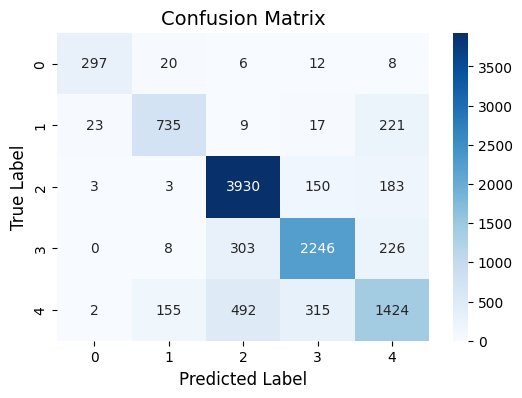

In [28]:
# visualization of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix', fontsize=14)  
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_13680\260350910.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


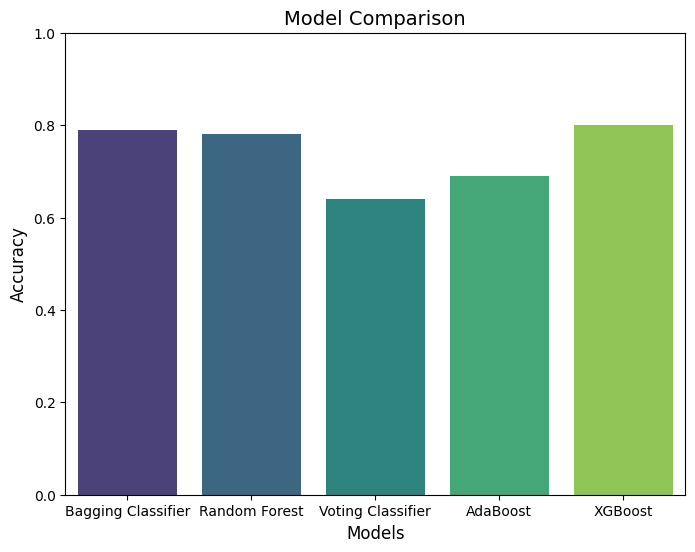

In [29]:
# Visualize the comparison

plt.figure(figsize=(8, 6))
sns.barplot(
    x='Model',
    y='Accuracy',
    data=comparison_df,
    palette='viridis'   # Optional: change color palette
)
plt.title('Model Comparison', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
plt.show()
